# Analyze the Benchmarking of Socket Server/Client

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['fivethirtyeight'])

In [2]:
with open('../benchmarks/socket_server/aws_c5n.2xlarge_2020_04_12.json') as fp:
    unstructed = json.load(fp)

In [3]:
assert unstructed['duration'] == 'PT3S'
duration_seconds = 3

In [4]:
results = pd.DataFrame(unstructed['results'])
results.head()

,serverThreads,clientThreads,trialIndex,messages
0,2,2,0,77523
1,8,8,4,177968
2,1,8,2,153260
3,4,1,4,54630
4,4,64,7,150949


In [5]:
agg_results = results.groupby(['serverThreads', 'clientThreads'])['messages'].describe()
agg_results.head()

count      mean          std       min  \
serverThreads clientThreads                                           
1             1               10.0   65703.0   859.646568   63477.0   
              2               10.0  128461.6  4433.391634  116697.0   
              4               10.0  157717.6  3083.550306  151632.0   
              8               10.0  149635.4  4088.342131  138790.0   
              16              10.0  155179.8  3341.082486  151229.0   

                                   25%       50%        75%       max  
serverThreads clientThreads                                            
1             1               65907.75   66042.0   66142.50   66223.0  
              2              128834.00  129763.0  131063.00  131279.0  
              4              156049.50  159080.5  159926.00  160644.0  
              8              149619.25  150119.0  151790.50  153260.0  
              16             152310.75  153962.0  158139.25  159695.0

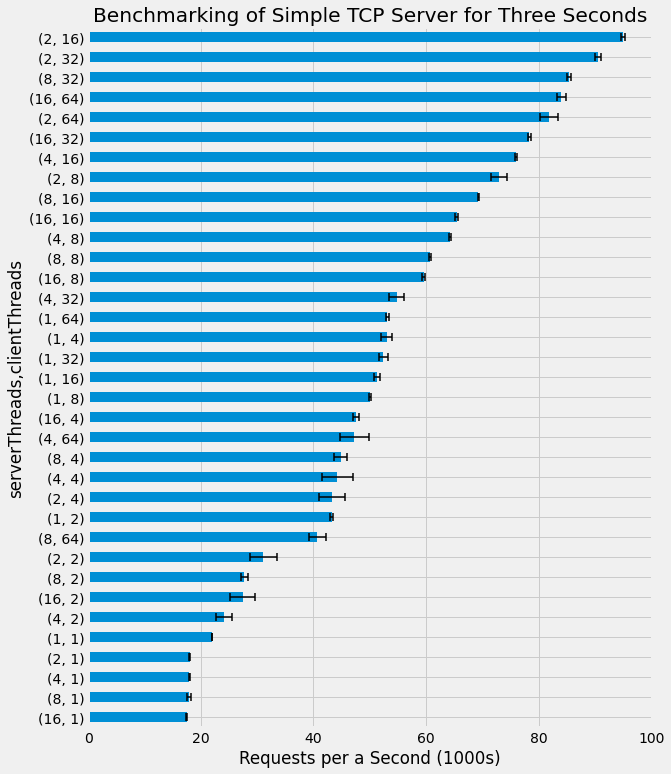

In [6]:
x = agg_results.div(1000).div(duration_seconds).sort_values('50%')
iq = x[['25%', '75%']].copy()
iq['25%'] = x['50%'] - iq['25%']
iq['75%'] -= x['50%']
x.plot.barh(figsize=(9, 12), y='50%', xerr=iq.values.T,
            error_kw=dict(ecolor='black', lw=1.5, capsize=4, capthick=1.5))
plt.gca().get_legend().remove()
plt.xlabel('Requests per a Second (1000s)')
plt.title('Benchmarking of Simple TCP Server for Three Seconds')
del x